<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n250.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,37.967732,3.561844,51.529576,43.603364,7.926212
1,0.0,1.0,73.752004,-1.300271,82.451733,89.909950,-7.458218
2,0.0,2.0,77.435589,13.624461,101.060050,94.676689,6.383361
3,0.0,3.0,39.527115,10.643589,60.170704,45.621281,14.549423
4,0.0,4.0,81.095578,23.007282,114.102860,99.412892,14.689967
...,...,...,...,...,...,...,...
29995,999.0,25.0,86.847473,-19.126380,77.721093,93.573666,-15.852574
29996,999.0,26.0,71.224275,6.786971,88.011246,79.806878,8.204368
29997,999.0,27.0,91.395882,-7.730855,93.665027,97.581616,-3.916589
29998,999.0,28.0,88.038720,-27.364068,70.674652,94.623365,-23.948713


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,37.967732,3.561844,51.529576,43.603364,7.926212
1,0.0,1.0,73.752004,-1.300271,82.451733,89.909950,-7.458218
2,0.0,2.0,77.435589,13.624461,101.060050,94.676689,6.383361
3,0.0,3.0,39.527115,10.643589,60.170704,45.621281,14.549423
4,0.0,4.0,81.095578,23.007282,114.102860,99.412892,14.689967
...,...,...,...,...,...,...,...
29995,999.0,25.0,86.847473,-19.126380,77.721093,93.573666,-15.852574
29996,999.0,26.0,71.224275,6.786971,88.011246,79.806878,8.204368
29997,999.0,27.0,91.395882,-7.730855,93.665027,97.581616,-3.916589
29998,999.0,28.0,88.038720,-27.364068,70.674652,94.623365,-23.948713


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,37.967732,3.561844,51.529576,43.603364,7.926212
1,0.0,1.0,73.752004,-1.300271,82.451733,89.909950,-7.458218
2,0.0,2.0,77.435589,13.624461,101.060050,94.676689,6.383361
3,0.0,3.0,39.527115,10.643589,60.170704,45.621281,14.549423
4,0.0,4.0,81.095578,23.007282,114.102860,99.412892,14.689967
...,...,...,...,...,...,...,...
29995,999.0,25.0,86.847473,-19.126380,77.721093,93.573666,-15.852574
29996,999.0,26.0,71.224275,6.786971,88.011246,79.806878,8.204368
29997,999.0,27.0,91.395882,-7.730855,93.665027,97.581616,-3.916589
29998,999.0,28.0,88.038720,-27.364068,70.674652,94.623365,-23.948713


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

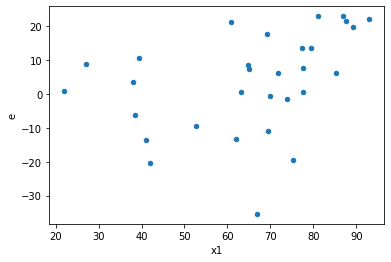

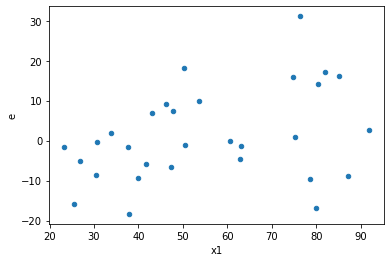

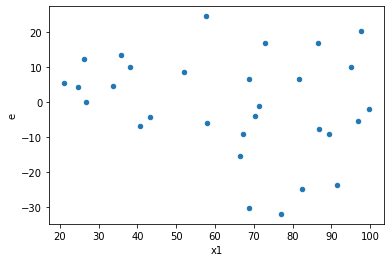

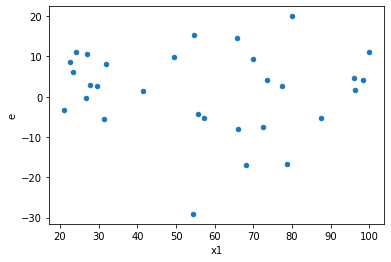

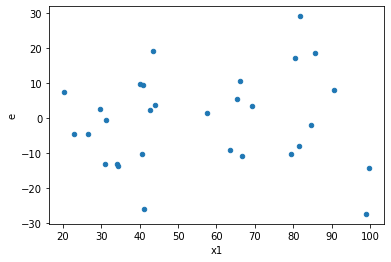

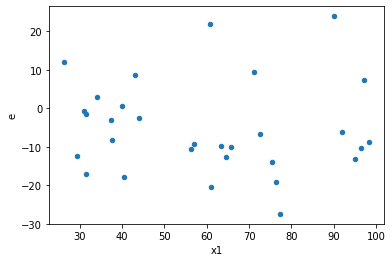

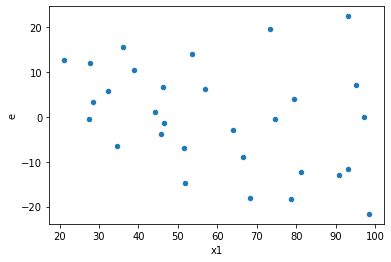

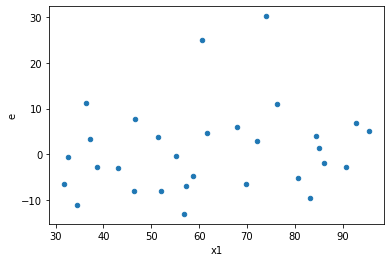

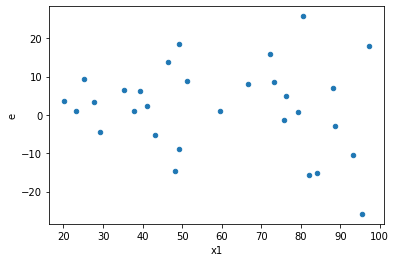

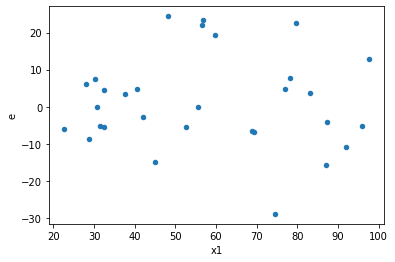

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,11.0,643.6378455435947,2190.786947662535,58.51253141305406,199.1624497875032,3.403757194874504,0.053646697653902065,0.973176651173049,0.026823348826951032,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,902.6134916122423,3315.4112917157286,82.0557719647493,301.40102651961166,3.673124014348337,0.0410842210395479,0.979457889480226,0.02054211051977395,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,338.856677273491,1168.2706230831552,30.805152479408275,106.20642028028684,3.447683641601209,0.05132171543800568,0.9743391422809972,0.02566085771900284,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,1263.2230059765304,2598.544273927552,114.83845508877549,236.23129762977743,2.057074848726932,0.24717040888205632,0.8764147955589718,0.12358520444102816,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,947.7080432687812,2011.9518405422887,86.1552766607983,182.9047127765717,2.1229658805076483,0.2275289650307286,0.8862355174846357,0.1137644825153643,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,474.7377303466742,2399.0629675858027,43.15797548606129,218.09663341689114,5.053449124075102,0.012293772679212278,0.9938531136603939,0.006146886339606139,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,505.04868964837016,1165.4514964979248,45.913517240760925,105.9501360452659,2.3076022577335,0.18121650843238513,0.9093917457838074,0.09060825421619256,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,572.9677585538424,2249.0362154616682,52.08797805034931,204.45783776924256,3.92524043785323,0.03233341504139098,0.9838332924793045,0.01616670752069549,Reject001=1 : Homoscedasticity
9.0,11.0,11.0,510.61941589748596,1990.519480576315,46.41994689977145,180.9563164160286,3.8982447956423565,0.033158437076492575,0.9834207814617537,0.016579218538246288,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,1631.2032361597987,907.9341312574295,148.29120328725443,82.53946647794814,0.5566039296212412,0.3455290584183058,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,643.6378455435947,2190.786947662535,58.51253141305406,199.1624497875032,3.403757194874504,0.053646697653902065,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,902.6134916122423,3315.4112917157286,82.0557719647493,301.40102651961166,3.673124014348337,0.0410842210395479,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,338.856677273491,1168.2706230831552,30.805152479408275,106.20642028028684,3.447683641601209,0.05132171543800568,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,1263.2230059765304,2598.544273927552,114.83845508877549,236.23129762977743,2.057074848726932,0.24717040888205632,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,947.7080432687812,2011.9518405422887,86.1552766607983,182.9047127765717,2.1229658805076483,0.2275289650307286,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,474.7377303466742,2399.0629675858027,43.15797548606129,218.09663341689114,5.053449124075102,0.012293772679212278,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,505.04868964837016,1165.4514964979248,45.913517240760925,105.9501360452659,2.3076022577335,0.18121650843238513,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,572.9677585538424,2249.0362154616682,52.08797805034931,204.45783776924256,3.92524043785323,0.03233341504139098,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      838
Reject001=0 : Heteroscedasticity    162
Name: Result_test, dtype: int64